In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import norm

In [2]:
def simulate_hypothesis(n_samples, n_simulations, diff = 0):
    # n_samples = 100
    # n_simulations = 1000
    
    simulated_dist = [np.random.normal(size=n_samples) for i in range(n_simulations)]
    sampling_dist_h0 = np.mean(simulated_dist, axis = 1)
    sampling_dist_ha = sampling_dist_h0 + diff
    
    plt.hist(sampling_dist_h0, bins=50, color="y")
    plt.hist(sampling_dist_ha, bins=50, color="r") 
    plt.show()
    

In [ ]:
(1000, 100)

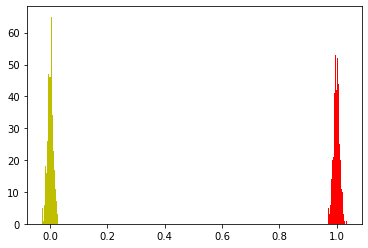

In [7]:
simulate_hypothesis(n = 10000, 1000, diff = 1)

In [8]:
prev_yt_data = pd.read_csv("prev_data.csv")

In [9]:
prev_yt_data

,date,customer_id,premium,watch_time_hrs
0,2017-05-23,865,0,4.014356
1,2017-04-27,538,0,2.276858
2,2017-09-06,495,0,4.695549
3,2017-03-15,247,0,1.244982
4,2017-10-25,471,0,2.558311
...,...,...,...,...
19995,2017-08-08,193,0,2.980606
19996,2017-09-18,67,0,3.900742
19997,2017-08-14,421,0,16.966625
19998,2017-02-03,915,0,2.422626


In [10]:
prev_yt_data.describe()

,customer_id,premium,watch_time_hrs
count,20000.000000,20000.000000,20000.000000
mean,496.860200,0.155450,8.121169
std,287.733041,0.362342,212.138482
min,0.000000,0.000000,0.192767
25%,250.000000,0.000000,1.769474
50%,496.000000,0.000000,2.854844
75%,742.250000,0.000000,4.551919
max,999.000000,1.000000,10008.561895


In [11]:
q998 = prev_yt_data["watch_time_hrs"].quantile(0.998)
q998

23.93426900607841

In [12]:
prev_yt_data_no_out = prev_yt_data[prev_yt_data["watch_time_hrs"]<q998]

In [13]:
mu_h0 = np.mean(prev_yt_data_no_out["watch_time_hrs"])
mu_h0

3.578971070350512

In [15]:
# capture if there is a 10% difference
diff_mu = np.abs(mu_h0 * 0.1)
diff_mu

0.35789710703505123

In [16]:
# Effect size: Cohen'd (mu1 - mu2)/sigma

cohens_d_effect_size = diff_mu / np.std(prev_yt_data_no_out["watch_time_hrs"])
cohens_d_effect_size

0.13374109689019162

In [17]:
from statsmodels.stats.power import TTestIndPower

In [ ]:
# Given effect_size, 
# significance (alpha) and power (1 - beta), gives num of sample

In [18]:
TTestIndPower().solve_power(
    effect_size = cohens_d_effect_size,
    alpha = 0.05,
    power = 0.80
)

878.5820842194388

In [19]:
np.arange(0.1, 1.0, 0.03)

array([0.1 , 0.13, 0.16, 0.19, 0.22, 0.25, 0.28, 0.31, 0.34, 0.37, 0.4 ,
       0.43, 0.46, 0.49, 0.52, 0.55, 0.58, 0.61, 0.64, 0.67, 0.7 , 0.73,
       0.76, 0.79, 0.82, 0.85, 0.88, 0.91, 0.94, 0.97, 1.  ])

In [20]:
## n vs power
# -- a 
power_ss = [] # power vs sample size

for p in np.arange(0.1, 1.0, 0.03):
    s = TTestIndPower().solve_power(effect_size = cohens_d_effect_size, 
                                    alpha=0.05, 
                                    power=p)
    power_ss.append({"power": p, "min_sample_size": s})
pd.DataFrame(power_ss)

,power,min_sample_size
0,0.10,48.557757
1,0.13,76.273003
2,0.16,103.638798
3,0.19,130.823168
4,0.22,157.968034
5,0.25,185.198235
6,0.28,212.628048
7,0.31,240.366047
8,0.34,268.518958
9,0.37,297.194999


<AxesSubplot:xlabel='power'>

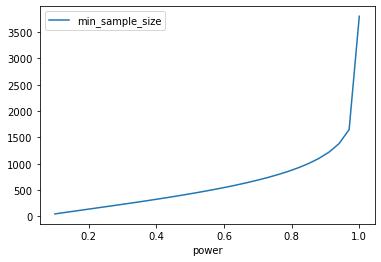

In [21]:
pd.DataFrame(power_ss).plot(x="power", y="min_sample_size")

<AxesSubplot:xlabel='alpha'>

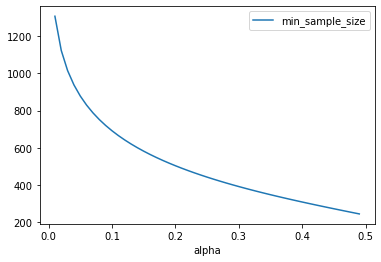

In [22]:
alpha_ss = []
for alpha in np.arange(0.01, 0.5, 0.01):
    s = TTestIndPower().solve_power(effect_size=cohens_d_effect_size, alpha=alpha, power=0.8)
    alpha_ss.append({"alpha": alpha, "min_sample_size": s})

pd.DataFrame(alpha_ss).plot(x="alpha", y="min_sample_size")

In [ ]:
## Homework : effect size vs num samples